In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd


In [5]:
df =pd.read_csv('Data1.csv')
df.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201,3,08-02-2016 05:46,08-02-2016 11:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,08-02-2016 05:58,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201,2,08-02-2016 06:07,08-02-2016 06:37,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,08-02-2016 05:51,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201,2,08-02-2016 06:49,08-02-2016 07:19,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,08-02-2016 06:56,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-15000,MapQuest,201,3,08-02-2016 07:23,08-02-2016 07:53,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,08-02-2016 07:38,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201,2,08-02-2016 07:39,08-02-2016 08:09,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,08-02-2016 07:53,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199998 entries, 0 to 199997
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     199998 non-null  object 
 1   Source                 199998 non-null  object 
 2   TMC                    199998 non-null  int64  
 3   Severity               199998 non-null  int64  
 4   Start_Time             199998 non-null  object 
 5   End_Time               199998 non-null  object 
 6   Start_Lat              199998 non-null  float64
 7   Start_Lng              199998 non-null  float64
 8   End_Lat                0 non-null       float64
 9   End_Lng                0 non-null       float64
 10  Distance(mi)           199998 non-null  float64
 11  Description            199998 non-null  object 
 12  Number                 61101 non-null   float64
 13  Street                 199998 non-null  object 
 14  Side                   199998 non-nu

In [9]:
df.isnull().sum()

ID                            0
Source                        0
TMC                           0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  199998
End_Lng                  199998
Distance(mi)                  0
Description                   0
Number                   138897
Street                        0
Side                          0
City                         14
County                        0
State                         0
Zipcode                      30
Country                       0
Timezone                     30
Airport_Code                 30
Weather_Timestamp          1543
Temperature(F)             2835
Wind_Chill(F)            178608
Humidity(%)                3243
Pressure(in)               2203
Visibility(mi)             3262
Wind_Direction             1556
Wind_Speed(mph)           38443
Precipitation(in)        181649
Weather_

In [10]:
df.nunique()

ID                       199997
Source                        2
TMC                          21
Severity                      4
Start_Time               139904
End_Time                 139337
Start_Lat                 77477
Start_Lng                 76415
End_Lat                       0
End_Lng                       0
Distance(mi)                633
Description              144598
Number                    11752
Street                    22095
Side                          3
City                       2699
County                      389
State                        20
Zipcode                   30724
Country                       1
Timezone                      3
Airport_Code                448
Weather_Timestamp         56637
Temperature(F)              638
Wind_Chill(F)               670
Humidity(%)                  97
Pressure(in)                269
Visibility(mi)               37
Wind_Direction               24
Wind_Speed(mph)              68
Precipitation(in)           120
Weather_

In [11]:
df['Severity'].value_counts()

2    117809
3     81905
1       154
4       130
Name: Severity, dtype: int64

In [18]:
nboll=[col for col in df.columns if df[col].dtype==np.dtype('bool')]
nboll

['Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop']

In [ ]:
bolldf=df[nboll]
label_en=bolldf[bolldf.sum(axis=1)>1]
print('{}'.format(len(label_en)))

14807


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

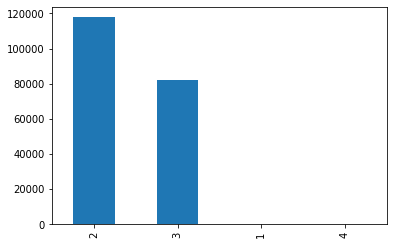

In [14]:
df['Severity'].value_counts().plot.bar()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


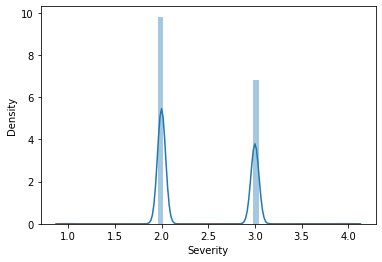

In [15]:
sns.distplot(df['Severity'])

In [21]:
st = pd.to_datetime(df.Start_Time, format='%d-%m-%Y %H:%M')
end = pd.to_datetime(df.End_Time, format='%d-%m-%Y %H:%M')

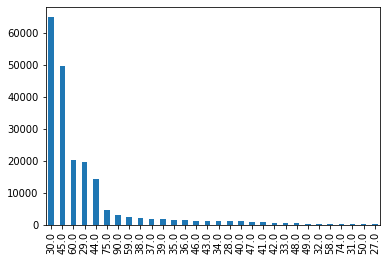

In [29]:
diff=(end-st)
nmore = diff.astype('timedelta64[m]').value_counts().nlargest(30)
nmore.plot.bar()

In [34]:
df['time'] = pd.to_datetime(df.Start_Time, format='%d-%m-%Y %H:%M')
df = df.set_index('time')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,MapQuest,201,3,08-02-2016 05:46,08-02-2016 11:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,08-02-2016 05:58,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 06:07:00,A-2,MapQuest,201,2,08-02-2016 06:07,08-02-2016 06:37,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,08-02-2016 05:51,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2016-02-08 06:49:00,A-3,MapQuest,201,2,08-02-2016 06:49,08-02-2016 07:19,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,08-02-2016 06:56,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
2016-02-08 07:23:00,A-15000,MapQuest,201,3,08-02-2016 07:23,08-02-2016 07:53,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,08-02-2016 07:38,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
2016-02-08 07:39:00,A-5,MapQuest,201,2,08-02-2016 07:39,08-02-2016 08:09,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,08-02-2016 07:53,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


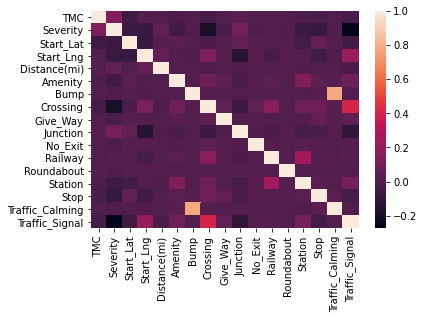

In [42]:

def corr(df):
    df = df.dropna('columns') 
    df = df[[col for col in df if df[col].nunique() > 1]] 
    if df.shape[1] < 2:
        print('no use')
        return
    corr = df.corr()
    sns.heatmap(corr)
corr(df)


In [77]:
df_tem = df
df_tem.isnull().sum()

ID                            0
Source                        0
TMC                           0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  199998
End_Lng                  199998
Distance(mi)                  0
Description                   0
Number                   138897
Street                        0
Side                          0
City                         14
County                        0
State                         0
Zipcode                      30
Country                       0
Timezone                     30
Airport_Code                 30
Weather_Timestamp          1543
Temperature(F)             2835
Wind_Chill(F)            178608
Humidity(%)                3243
Pressure(in)               2203
Visibility(mi)             3262
Wind_Direction             1556
Wind_Speed(mph)           38443
Precipitation(in)        181649
Weather_

In [78]:
df_tem = df_tem.drop(['Distance(mi)', 'TMC', 'Country', 'Description', 'City', 'County', 'Street', 'Side', 'Zipcode', 'State', 'Airport_Code', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1)

In [79]:
df_tem.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Number,Timezone,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,MapQuest,3,08-02-2016 05:46,08-02-2016 11:00,39.865147,-84.058723,NaN,NaN,NaN,US/Eastern,08-02-2016 05:58,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
2016-02-08 06:07:00,A-2,MapQuest,2,08-02-2016 06:07,08-02-2016 06:37,39.928059,-82.831184,NaN,NaN,2584.0,US/Eastern,08-02-2016 05:51,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
2016-02-08 06:49:00,A-3,MapQuest,2,08-02-2016 06:49,08-02-2016 07:19,39.063148,-84.032608,NaN,NaN,NaN,US/Eastern,08-02-2016 06:56,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night
2016-02-08 07:23:00,A-15000,MapQuest,3,08-02-2016 07:23,08-02-2016 07:53,39.747753,-84.205582,NaN,NaN,NaN,US/Eastern,08-02-2016 07:38,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
2016-02-08 07:39:00,A-5,MapQuest,2,08-02-2016 07:39,08-02-2016 08:09,39.627781,-84.188354,NaN,NaN,NaN,US/Eastern,08-02-2016 07:53,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day


In [80]:
cols = ["End_Lat", "End_Lng", "Number"]
df_tem = df_tem.drop(cols, axis=1)

In [82]:
pmean = df_tem['Pressure(in)'].mean()
tmean = df_tem['Temperature(F)'].mean()
wcmean = df_tem['Wind_Chill(F)'].mean()
hmean = df_tem['Humidity(%)'].mean()
wsmean = df_tem['Wind_Speed(mph)'].mean()
prmean = df_tem['Precipitation(in)'].mean()

In [83]:
df_tem['Pressure(in)']=df1['Pressure(in)'].fillna(pmean)
df_tem['Temperature(F)'] = df1['Temperature(F)'].fillna(tmean)
df_tem['Wind_Chill(F)'] = df1['Wind_Chill(F)'].fillna(wcmean)
df_tem['Humidity(%)'] = df1['Humidity(%)'].fillna(hmean)
df_tem['Wind_Speed(mph)'] = df1['Wind_Speed(mph)'].fillna(wsmean)
df_tem['Precipitation(in)']=df1['Precipitation(in)'].fillna(prmean)

In [85]:
df.isnull().sum()

ID                            0
Source                        0
TMC                           0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  199998
End_Lng                  199998
Distance(mi)                  0
Description                   0
Number                   138897
Street                        0
Side                          0
City                         14
County                        0
State                         0
Zipcode                      30
Country                       0
Timezone                     30
Airport_Code                 30
Weather_Timestamp          1543
Temperature(F)             2835
Wind_Chill(F)            178608
Humidity(%)                3243
Pressure(in)               2203
Visibility(mi)             3262
Wind_Direction             1556
Wind_Speed(mph)           38443
Precipitation(in)        181649
Weather_

In [91]:
visMode = df1["Visibility(mi)"].mode()
df_tem['Visibility(mi)'] = df_tem['Visibility(mi)'].fillna(df1['Visibility(mi)'].mode()[0])
df_tem['Wind_Direction'] = df_tem['Wind_Direction'].fillna(df1['Wind_Direction'].mode()[0])
df_tem['Weather_Condition'] = df_tem['Weather_Condition'].fillna(df1['Weather_Condition'].mode()[0])
df_tem['Sunrise_Sunset'] = df_tem['Sunrise_Sunset'].fillna(df1['Sunrise_Sunset'].mode()[0])

In [96]:
df_tem.dropna(axis=0, inplace=True)

In [99]:
df_tem.head()

,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
time,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,3,39.865147,-84.058723,36.9,30.399621,91.0,29.68,10.0,Calm,8.511951,0.020000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
2016-02-08 06:07:00,2,39.928059,-82.831184,37.9,30.399621,100.0,29.65,10.0,Calm,8.511951,0.000000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
2016-02-08 06:49:00,2,39.063148,-84.032608,36.0,33.300000,100.0,29.67,10.0,SW,3.500000,0.057422,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night
2016-02-08 07:23:00,3,39.747753,-84.205582,35.1,31.000000,96.0,29.64,9.0,SW,4.600000,0.057422,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
2016-02-08 07:39:00,2,39.627781,-84.188354,36.0,33.300000,89.0,29.65,6.0,SW,3.500000,0.057422,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day


In [100]:
final_corr=df_tem.corr()

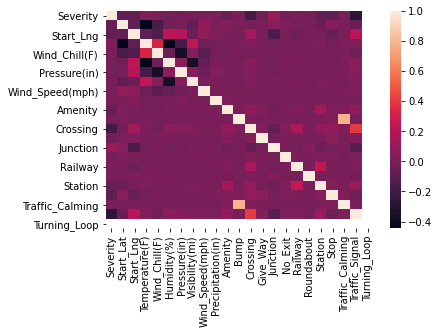

In [101]:
sns.heatmap(final_corr)